In [1]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from helpers import *
%load_ext autoreload
%autoreload 2

# Random Walks

In this exercise you will implement a simple random walk on a torus graph and will check its convergence to uniform distribution.

Torus is a 2D-grid graph and looks like a 'doughnout', as shown in the picture below. 
<img src="torus_topology.png" alt="Drawing" style="width: 200px;"/>

**Note:** We will use the networkx library to generate our graph. You can install this using

```bash
    pip3 install --upgrade --user networkx
```

Let's generate the probability matrix $\mathbf{G}$ of a torus graph of size $4\times 4$, note that we include self-loops too. You can play around with the code in the helpers.py to generate different graphs.

In [23]:
n_nodes = 25
A = generate_torus_adj_matrix(n_nodes)
G = A/5

Lets now implement random walk on a torus.

In [24]:
def random_walk(G, num_iter):
    ''' Performs num_iter steps of a random walk on a graph with graph matrix G,
        starting from the initial position at node 1.
        Output:
        positions: an array of integer positions in a graph at each iteration
    '''
    pos = 0
    positions = [pos]
    for t in range(0, num_iter):
        pos = np.random.choice(np.nonzero(G[pos])[0])
        positions.append(pos)
    return positions

Now we will estimate probability distribution at each iteration. For this we will perform random walk on a graph 100 times and calculate how frequently we visited each node at each iteration.

In [25]:
num_iter = 15
num_repeat = 100 * 1000
frequencies = np.zeros((num_iter + 1, n_nodes))
for _ in range(num_repeat):
    positions = random_walk(G, num_iter)
    frequencies[np.arange(len(positions)), np.array(positions)] += 1
frequencies /= num_repeat

Lets plot our distribution at the last step.

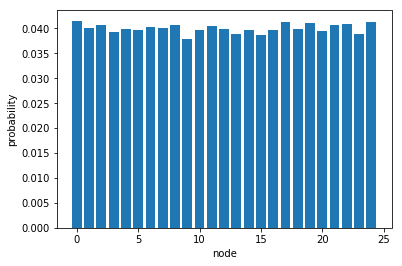

In [26]:
plt.bar(np.arange(n_nodes), frequencies[-1])
plt.xlabel("node")
plt.ylabel("probability")

We see that the final disctribution is indeed uniform. Lets now plot how fast did the algorithm converge. For this we need to compute errors $||x_{t} - \mu||_2^2$ at each iteration, where $x_{t}$ is a distribution at step $t$ and $\mu$ is a uniforly distributed vector.

In [27]:
errors = np.linalg.norm(frequencies - np.ones(n_nodes) / n_nodes, axis=1)

Lets now plot how fast did the algorithm converge. We will use logarithmic scale on y-axis to be able to distinguish between sublinear and linear rates.

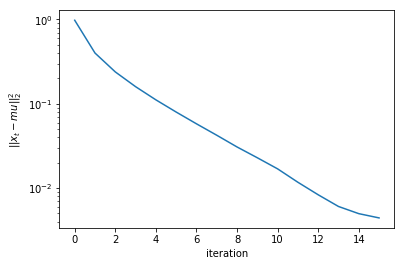

In [28]:
plt.semilogy(errors)
plt.xlabel("iteration")
plt.ylabel("$||x_{t} - mu||_2^2$")
plt.show()